# Homework 2: Numerical integration
**Due Friday, April 17**

*Rey Lambert*

### Homework checklist

Before submitting, make sure that you

- Fill in your name in the space above .
- Cite any resources that you used while working on this homework ...
- 1.a. Fill in the code cell to write a function that performs integration using Simpson's rule  ...
- 1.b. Run the code cell to test the function, then comment on the results below  ...
- 2.a. Write your own code to evaluate the Bessel function  ...
- 2.b. Run the code cell to test the function, then comment on the results below  ...
- 2.c. Fill in the code block to evaluate the Bessel functions and plot the results  ...

## 1. Integration with Simpson's rule

Write a function to perform integration using **Simpson's rule**. The input parameters to the integrator function should be:
* A function, $f$
* Two real numbers giving the limits of integration
* The number of subdivisions $N$ to use for estimating the integral

There are many different ways that you could implement integration using Simpson's rule (for example, see Chapter 5 of Newman's *[Computational Physics](http://www-personal.umich.edu/~mejn/cp/chapters.html)*). You are free to choose any approach that you like. If you're already comfortable with Python, you might want to try an implementation that uses numpy arrays and [vectorization](https://realpython.com/numpy-array-programming/).

### 1.a. Write the integration function

Fill in the function outline below. If you're having trouble getting started, try writing out all the individual computations that need to be performed to estimate the integral. Then, code each one of them individually.

In [31]:
def integrate(f, a, b, N):
    
    if N%2!=0: # need an even number of steps
        N+=1 
    
    dx=(b-a)/N  # length of intervals  
    
    total=0    # initialize sum value
    
    for i in range(N): # add up the areas while skipping the even x_i values
        if i%2==0:
            continue
        total+=(dx/3)*(f(a+(i-1)*dx)+4*f(a+i*dx)+f(a+(i+1)*dx))    
    
    return total # Return the result

### 1.b. Test the function

Test your function in the cell below.

In [9]:
def test_quad(x):
    return 3*x**2

integrate(test_quad, 0, 1, 10)

1.0

Compare your output with the analytical result here. Does it perform as expected?

*The Simpson's rule integral gives the value 1.0 while the analytical result is exactly 1.*

## 2. Application: diffraction patterns generated by a circular aperture

When might we need to perform numerical integration? Here is one example from Exercise 5.4 in Newman's [Computational Physics](http://www-personal.umich.edu/~mejn/cp/chapters.html) textbook.

When light with wavelength $\lambda$ passes through a circular aperture, as in a telescope, it doesn't produce just a single point of light in the focal plane. Rather, the light is *diffracted*, producing a central bright spot surrounded by alternating bright and dark rings. Mathematically, the intensity of the focused light is given by

$$I(r) = \frac{J_1(kr)}{kr}^2\,,$$

where $r$ is the distance from the center of the focal plane, $k = 2\pi/\lambda$, and $J_1$ is the order 1 [Bessel function](https://en.wikipedia.org/wiki/Bessel_function) of the first kind. For more information, follow the Wikipedia link. Bessel functions appear very frequently in physics.

One way to define the Bessel functions $J_m$ is through an integral,

$$ J_m(x) = \frac{1}{\pi}\int_0^\pi\!d\theta\; \cos(m\theta - x \sin \theta) \, $$ 

where $m$ is a nonnegative integer and $x\geq 0$. 

In the rest of the exercise below, we'll write a function to evaluate the Bessel function using our integrator defined in part 1. Then we'll test it and plot the results.

### 2.a. Write the Bessel function

Write your own version of the Bessel function by filling in the cell below. We'll assume that the number of divisions is 1000.

In [28]:
import numpy as np

def J(m, x):
    """
    mth Bessel function of the first kind evaluated at real number x,  
    calculated using an integral representation with Simpson's rule and 1000 divisions.
    """
    
    def integrand(theta):        #value of the integrand for convenience 
        return np.cos(m*theta-x*np.sin(theta))
    
    return (1/np.pi)*integrate(integrand, 0, np.pi, 1000) # Return your result here

### 2.b. Test the function

Now, test your function in the cell below.

In [29]:
print(J(1,1))

0.4400505857449339


How does this compare with the expected result? Let's check our answer against the built-in Bessel function evaluator in `scipy`.

In [30]:
import scipy.special as sp

print(J(1,1) - sp.jv(1, 1))

3.3306690738754696e-16


*The function gives a result that is very accurate to the expected value*

### An aside 

Why are we implementing our own method to evaluate the Bessel function when another one already exists? As you might have guessed, this is just for practice, and practice works best when there are well-established results that you can compare with. 

In your own computational adventures, the first step in any problem is to **check whether someone else has already solved it first**. If a solution exists, it will almost always be better to use the existing software and build on top of it, rather than "reinventing the wheel." Why? Consider the frenzied activity in the [numpy repository](https://github.com/numpy/numpy) on GitHub. Hundreds of people are working to ensure that numpy is fast and accurate. This is not a situation where a team of 1 can compete.

However, in research or industry we may encounter niche problems that have not yet been solved, or where standard techniques fail. In these cases we may indeed need to start from the beginning.

### 2.c. Plot the Bessel function(s)

Now, let's use our function `J(m, x)` to plot three different Bessel functions, $J_0(x)$, $J_1(x)$ and $J_2(x)$. Your job is to fill in the following code to produce these plots. The outline below uses `seaborn`, but you're also welcome to use `matplotlib` directly if you'd like.

*Hint*: You can check your answers by consulting [Wikipedia](https://en.wikipedia.org/wiki/Bessel_function).

*Hint*$^2$: Your function for evaluating the Bessel functions might take a little bit of time. You can potentially make it faster, and easier to use, with the `numpy.vectorize` function. For more information, look [here](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.vectorize.html). If you vectorize `J(m, x)` then it will be able to operate on entire numpy arrays at once.

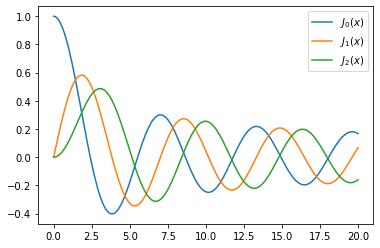

In [41]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# x sample points
x = np.linspace(0, 20, 200)

y0 = J(0,x) # y-values of J0(x)
y1 = J(1,x) # y-values of J1(x)
y2 = J(2,x) # y-values of J2(x)

sns.lineplot(x, y0, label='$J_0(x)$')

sns.lineplot(x, y1, label='$J_1(x)$')

sns.lineplot(x, y2, label='$J_2(x)$',)